In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors

df = pd.read_excel('Data_target/merged_sensors_data_modified.xlsx')

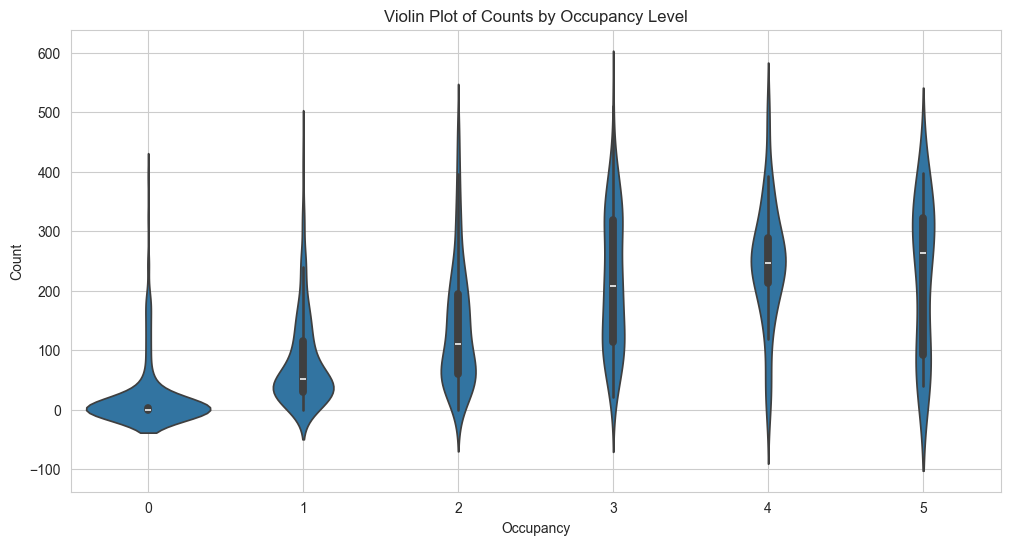

In [40]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='occupancy', y='Count_2P02', data=df)
plt.xlabel('Occupancy')
plt.ylabel('Count')
plt.title('Violin Plot of Counts by Occupancy Level')
plt.grid(True)
plt.show()

Count 0 has a mean of 22.256880733944953 and a standard deviation of 57.09171272710903, meaning this is the range -34.83483199316407 to 79.34859346105398.

Count 1 has a mean of 81.51757188498402 and a standard deviation of 79.0978004117864, meaning this is the range 2.4197714731976276 to 160.61537229677043.

Count 2 has a mean of 139.04845814977975 and a standard deviation of 104.0307235711029, meaning this is the range 35.01773457867685 to 243.07918172088264.

Count 3 has a mean of 214.72527472527472 and a standard deviation of 113.55841041645738, meaning this is the range 101.16686430881734 to 328.2836851417321.

Count 5 has a mean of 223.4375 and a standard deviation of 124.41434469813626, meaning this is the range 99.02315530186374 to 347.85184469813623.

Count 4 has a mean of 244.85185185185185 and a standard deviation of 101.11331349687468, meaning this is the range 143.73853835497715 to 345.96516534872654.



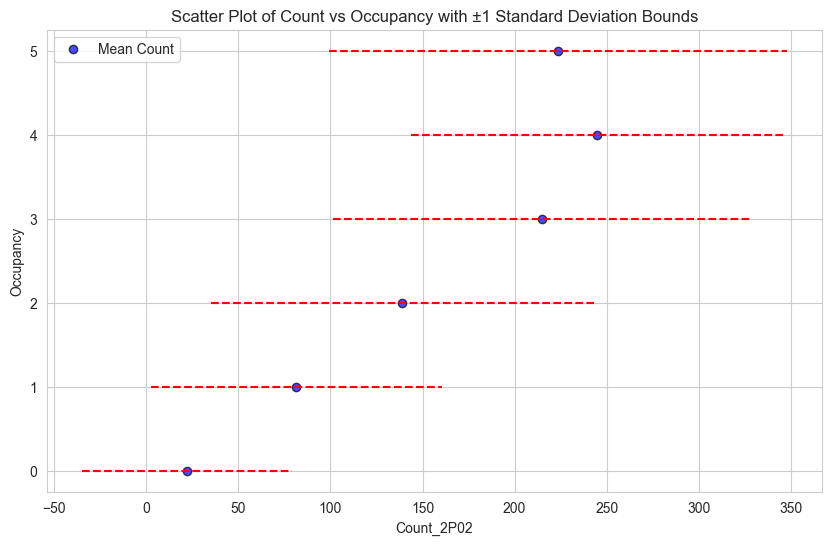

In [41]:
means = []
stds = []
occupancies = df['occupancy'].unique()

for x in occupancies:
    df_temp = df[df['occupancy'] == x]
    mean = df_temp['Count_2P02'].mean()
    std = df_temp['Count_2P02'].std()
    means.append(mean)
    stds.append(std)
    print(f'Count {x} has a mean of {mean} and a standard deviation of {std}, meaning this is the range {mean - std} to {mean + std}.\n')

stats_df = pd.DataFrame({
    'occupancy': occupancies,
    'mean': means,
    'std': stds
})

stats_df['lower_bound'] = stats_df['mean'] - stats_df['std']
stats_df['upper_bound'] = stats_df['mean'] + stats_df['std']

plt.figure(figsize=(10, 6))

plt.scatter(stats_df['mean'], stats_df['occupancy'], color='blue', edgecolor='black', alpha=0.7, label='Mean Count')

for i in range(len(stats_df)):
    plt.plot([stats_df['lower_bound'][i], stats_df['upper_bound'][i]], [stats_df['occupancy'][i], stats_df['occupancy'][i]], color='red', linestyle='--')

plt.title('Scatter Plot of Count vs Occupancy with ±1 Standard Deviation Bounds')
plt.xlabel('Count_2P02')
plt.ylabel('Occupancy')
plt.legend()
plt.grid(True)
plt.show()

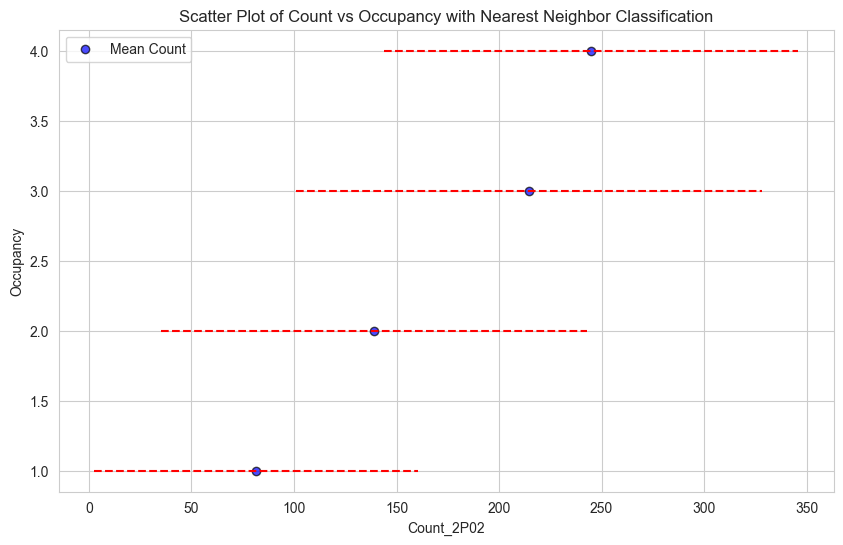

In [42]:
from sklearn.neighbors import NearestNeighbors

means = [81.51757188498402, 139.04845814977975, 214.72527472527472, 244.85185185185185]
stds = [79.0978004117864, 104.0307235711029, 113.55841041645738, 101.11331349687468]
occupancies = [ 1, 2, 3, 4]

means = np.array(means).reshape(-1, 1)
occupancies = np.array(occupancies)

neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(means)

def find_nearest_occupancy(count):
    distance, index = neigh.kneighbors(np.array([[count]]), return_distance=True)
    nearest_occupancy = occupancies[index[0][0]]
    return nearest_occupancy

plt.figure(figsize=(10, 6))
plt.scatter(means, occupancies, color='blue', edgecolor='black', alpha=0.7, label='Mean Count')

for i in range(len(means)):
    plt.plot([means[i] - stds[i], means[i] + stds[i]], [occupancies[i], occupancies[i]], color='red', linestyle='--')

plt.title('Scatter Plot of Count vs Occupancy with Nearest Neighbor Classification')
plt.xlabel('Count_2P02')
plt.ylabel('Occupancy')
plt.legend()
plt.grid(True)
plt.show()



In [43]:
import joblib
# slightly altered means to have results that are more accurate
means = np.array([ 61.51757188498402, 119.04845814977975, 214.72527472527472, 244.85185185185185]).reshape(-1, 1)
occupancies = np.array([1, 2, 3, 4])

neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(means)

joblib.dump(neigh, 'nearest_neighbors_model.pkl')
joblib.dump(occupancies, 'occupancies.pkl')

['occupancies.pkl']

In [44]:
categories = ['<= 2', '>= 3']
means = []


for category in categories:
    if category == '<= 2':
        df_temp = df[df['occupancy'] <= 2]
    elif category == '>= 3':
        df_temp = df[df['occupancy'] >= 3]
    
    mean = df_temp['Count_2P02'].mean()

    means.append(mean)

    print(f'Category {category} has a mean of {mean}\n')

print(f'So the threshold will be {sum(means) / 2}')

Category <= 2 has a mean of 81.70316622691293

Category >= 3 has a mean of 225.69565217391303

So the threshold will be 153.699409200413


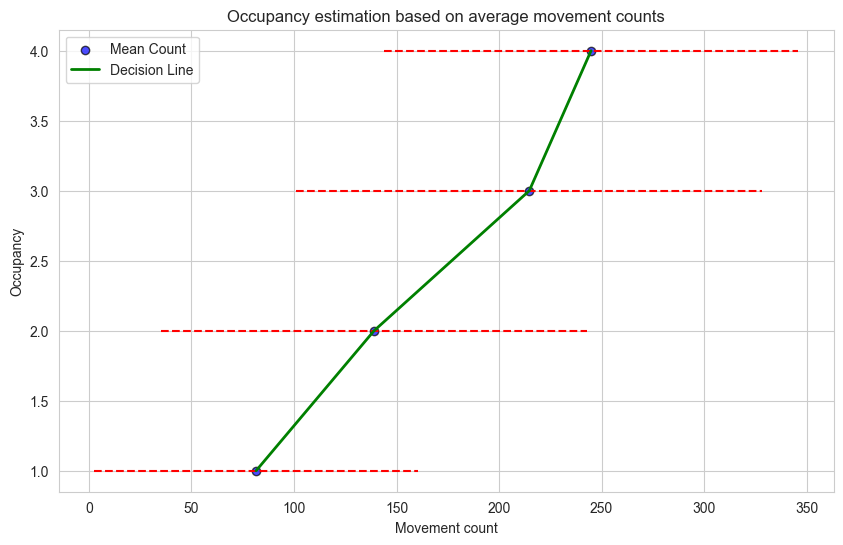

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Given data
means = [81.51757188498402, 139.04845814977975, 214.72527472527472, 244.85185185185185]
stds = [79.0978004117864, 104.0307235711029, 113.55841041645738, 101.11331349687468]
occupancies = [1, 2, 3, 4]

# Convert lists to numpy arrays and reshape as needed
means = np.array(means).reshape(-1, 1)
occupancies = np.array(occupancies)

# Nearest Neighbors fitting
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(means)

# Function to find the nearest occupancy
def find_nearest_occupancy(count):
    distance, index = neigh.kneighbors(np.array([[count]]), return_distance=True)
    nearest_occupancy = occupancies[index[0][0]]
    return nearest_occupancy

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot of means vs. occupancies
plt.scatter(means, occupancies, color='blue', edgecolor='black', alpha=0.7, label='Mean Count')

# Plot the error bars for each point
for i in range(len(means)):
    plt.plot([means[i] - stds[i], means[i] + stds[i]], [occupancies[i], occupancies[i]], color='red', linestyle='--')

# Plotting the line through the points
plt.plot(means, occupancies, color='green', linestyle='-', linewidth=2, label='Decision Line')

# Formatting the plot
plt.title('Occupancy estimation based on average movement counts')
plt.xlabel('Movement count')
plt.ylabel('Occupancy')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
